In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_csv('../data/results.csv')
shootouts = pd.read_csv('../data/shootouts.csv')
goalscorers = pd.read_csv('../data/goalscorers.csv')

In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [6]:
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [7]:
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year

In [8]:
print(results.info())

<class 'pandas.DataFrame'>
RangeIndex: 48949 entries, 0 to 48948
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48949 non-null  datetime64[us]
 1   home_team   48949 non-null  str           
 2   away_team   48949 non-null  str           
 3   home_score  48949 non-null  int64         
 4   away_score  48949 non-null  int64         
 5   tournament  48949 non-null  str           
 6   city        48949 non-null  str           
 7   country     48949 non-null  str           
 8   neutral     48949 non-null  bool          
 9   year        48949 non-null  int32         
dtypes: bool(1), datetime64[us](1), int32(1), int64(2), str(5)
memory usage: 3.2 MB
None


In [9]:
print(results.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64


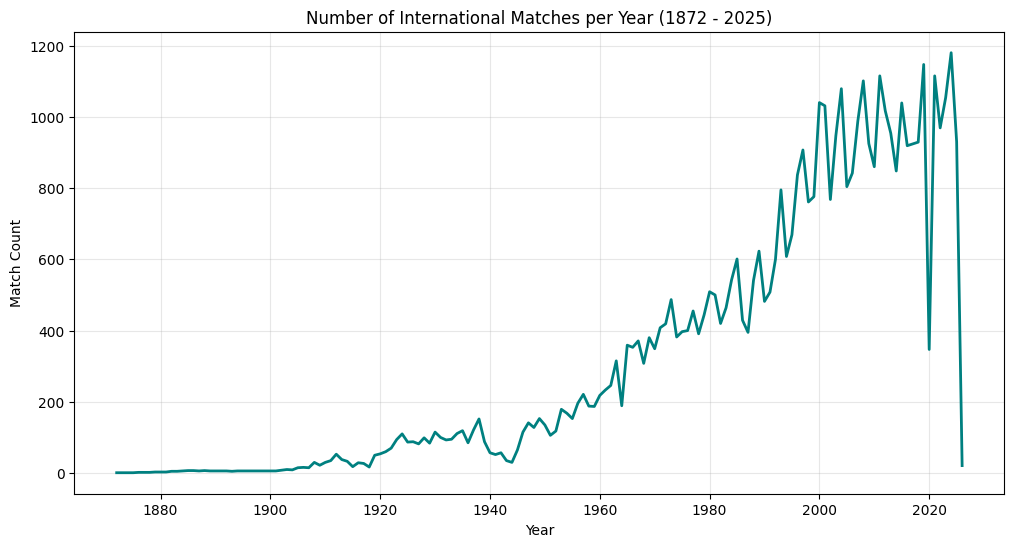

In [10]:
# Match Frequency Over Time
plt.figure(figsize=(12, 6))
results['year'].value_counts().sort_index().plot(kind='line', color='teal', linewidth=2)
plt.title('Number of International Matches per Year (1872 - 2025)')
plt.xlabel('Year')
plt.ylabel('Match Count')
plt.grid(True, alpha=0.3)
plt.show();

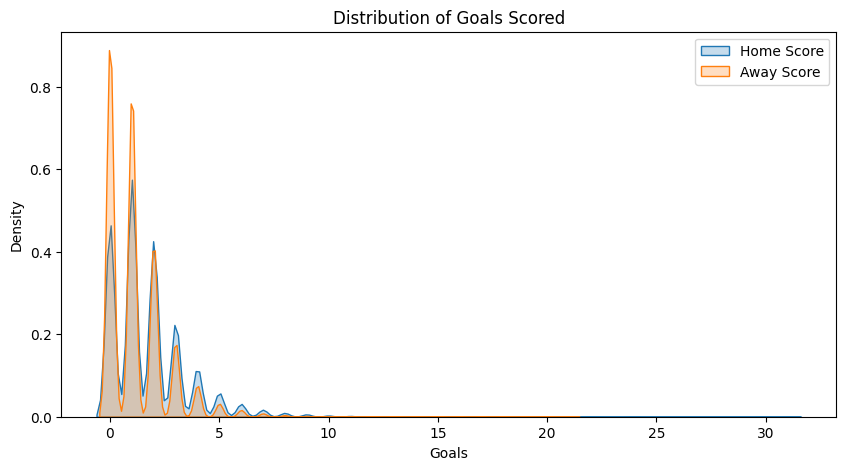

In [11]:
# Goal Distribution (Home vs Away)
plt.figure(figsize=(10, 5))
sns.kdeplot(results['home_score'], label='Home Score', fill=True)
sns.kdeplot(results['away_score'], label='Away Score', fill=True)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.legend()
plt.show();

In [12]:
# Result Outcomes (Home Win, Away Win, Draw)
def get_result(row):
    if row['home_score'] > row['away_score']: return 'Home Win'
    if row['home_score'] < row['away_score']: return 'Away Win'
    return 'Draw'

results['outcome'] = results.apply(get_result, axis=1)
outcome_counts = results['outcome'].value_counts(normalize=True) * 100

print("\n--- Match Outcomes (%) ---")
print(outcome_counts)


--- Match Outcomes (%) ---
outcome
Home Win    49.010194
Away Win    28.266155
Draw        22.723651
Name: proportion, dtype: float64


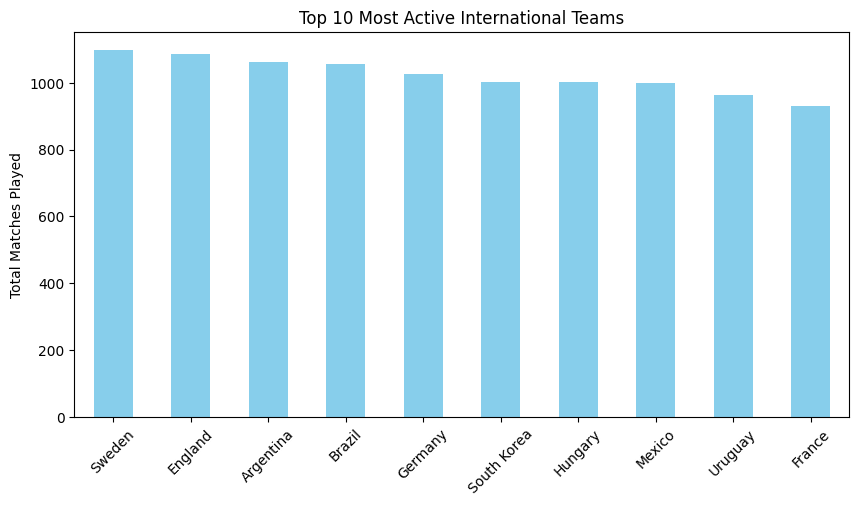

In [13]:
# Top 10 Most Active Teams
top_teams = pd.concat([results['home_team'], results['away_team']]).value_counts().head(10)
plt.figure(figsize=(10, 5))
top_teams.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Active International Teams')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Neutral vs Home Venue Impact
venue_impact = results.groupby('neutral')['outcome'].value_counts(normalize=True).unstack() * 100
print("\n--- Outcome Percentage: Neutral vs. Non-Neutral Venues ---")
print(venue_impact)


--- Outcome Percentage: Neutral vs. Non-Neutral Venues ---
outcome   Away Win       Draw   Home Win
neutral                                 
False    26.423937  22.846764  50.729300
True     33.421277  22.379142  44.199581


In [16]:
# --- 1. Shootout Analysis & "Jerarquía" Metric ---
# Calculate win rates and total experience in high-pressure situations
shootouts['winner_team'] = shootouts['winner']
all_shootout_teams = pd.concat([shootouts['home_team'], shootouts['away_team']])
shootout_wins = shootouts['winner'].value_counts()
shootout_appearances = all_shootout_teams.value_counts()

jerarquia_df = pd.DataFrame({
    'shootout_apps': shootout_appearances,
    'shootout_wins': shootout_wins
}).fillna(0)
jerarquia_df['shootout_win_rate'] = jerarquia_df['shootout_wins'] / jerarquia_df['shootout_apps']

print("--- Top 'Jerarquía' Teams (Min 5 Shootouts) ---")
print(jerarquia_df[jerarquia_df['shootout_apps'] >= 5].sort_values(by='shootout_win_rate', ascending=False).head(10))

--- Top 'Jerarquía' Teams (Min 5 Shootouts) ---
              shootout_apps  shootout_wins  shootout_win_rate
Padania                 6.0            6.0           1.000000
Indonesia              11.0           10.0           0.909091
Ethiopia                8.0            7.0           0.875000
Guatemala               5.0            4.0           0.800000
Guinea                 10.0            8.0           0.800000
Oman                    5.0            4.0           0.800000
Saudi Arabia            9.0            7.0           0.777778
Martinique              9.0            7.0           0.777778
Germany                 8.0            6.0           0.750000
Iraq                   15.0           11.0           0.733333


In [21]:
# Calculate total games played for every team in results.csv
total_games = pd.concat([results['home_team'], results['away_team']]).value_counts().reset_index()
total_games.columns = ['team', 'total_matches']

# Update jerarquia_df with total match context
jerarquia_df = jerarquia_df.reset_index().rename(columns={'index': 'team'})
jerarquia_df = pd.merge(jerarquia_df, total_games, on='team', how='left')

# New Metric: Jerarquia Score 
# We weight the win rate by the log of total appearances to favor established nations
jerarquia_df['jerarquia_score'] = jerarquia_df['shootout_win_rate'] * np.log1p(jerarquia_df['shootout_apps'])

# Filter for teams with at least 5 shootouts AND a significant history (e.g., > 100 total matches)
refined_jerarquia = jerarquia_df[
    (jerarquia_df['shootout_apps'] >= 5) & 
    (jerarquia_df['total_matches'] > 100)
].sort_values(by='jerarquia_score', ascending=False)

print("--- Refined 'Jerarquía' (Established Teams) ---")
print(refined_jerarquia[['team', 'shootout_apps', 'shootout_win_rate', 'total_matches']].head(10))

--- Refined 'Jerarquía' (Established Teams) ---
            team  shootout_apps  shootout_win_rate  total_matches
91     Indonesia           11.0           0.909091          721.0
7      Argentina           23.0           0.652174         1062.0
93          Iraq           15.0           0.733333          651.0
182  South Korea           25.0           0.600000         1003.0
61      Ethiopia            8.0           0.875000          405.0
81        Guinea           10.0           0.800000          534.0
54         Egypt           26.0           0.576923          750.0
197     Thailand           22.0           0.590909          863.0
105        Kenya           15.0           0.666667          701.0
222       Zambia           25.0           0.560000          790.0


In [17]:
# --- 2. Goalscorer Features: "The Carry Factor" ---
# Does having a dominant scorer or a high spread of scorers help?
goals_per_match = goalscorers.groupby(['date', 'home_team', 'away_team', 'team']).agg(
    total_goals=('scorer', 'count'),
    unique_scorers=('scorer', 'nunique')
).reset_index()

# Calculate 'Scoring Diversity' (Standard Deviation of goals across different players)
# High diversity means the team isn't reliant on just one person
team_scoring_stats = goalscorers.groupby('team').agg(
    avg_goals_per_game=('scorer', 'count'), # simplified for EDA
    unique_scorers_total=('scorer', 'nunique')
)

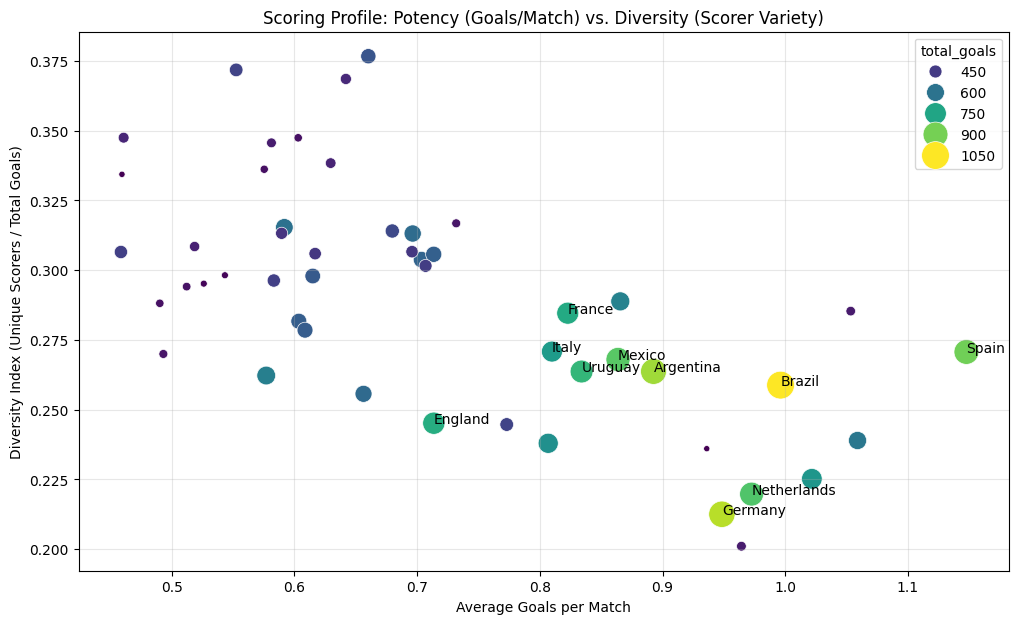

In [22]:
# Grouping goalscorers to see the "Reliability" vs "Diversity"
scoring_profile = goalscorers.groupby('team').agg(
    total_goals=('scorer', 'count'),
    unique_scorers=('scorer', 'nunique')
).reset_index()

# Merge with total games to get Goals Per Game
scoring_profile = pd.merge(scoring_profile, total_games, on='team')
scoring_profile['goals_per_match'] = scoring_profile['total_goals'] / scoring_profile['total_matches']
scoring_profile['diversity_index'] = scoring_profile['unique_scorers'] / scoring_profile['total_goals']

# Visualization: Diversity vs. Potency
plt.figure(figsize=(12, 7))
top_50_potency = scoring_profile.sort_values('total_goals', ascending=False).head(50)

sns.scatterplot(
    data=top_50_potency, 
    x='goals_per_match', 
    y='diversity_index', 
    size='total_goals', 
    hue='total_goals',
    sizes=(20, 400),
    palette='viridis'
)

# Labeling some key teams for context
for i in range(10):
    plt.text(
        top_50_potency.iloc[i]['goals_per_match'], 
        top_50_potency.iloc[i]['diversity_index'], 
        top_50_potency.iloc[i]['team']
    )

plt.title('Scoring Profile: Potency (Goals/Match) vs. Diversity (Scorer Variety)')
plt.xlabel('Average Goals per Match')
plt.ylabel('Diversity Index (Unique Scorers / Total Goals)')
plt.grid(True, alpha=0.3)
plt.show()

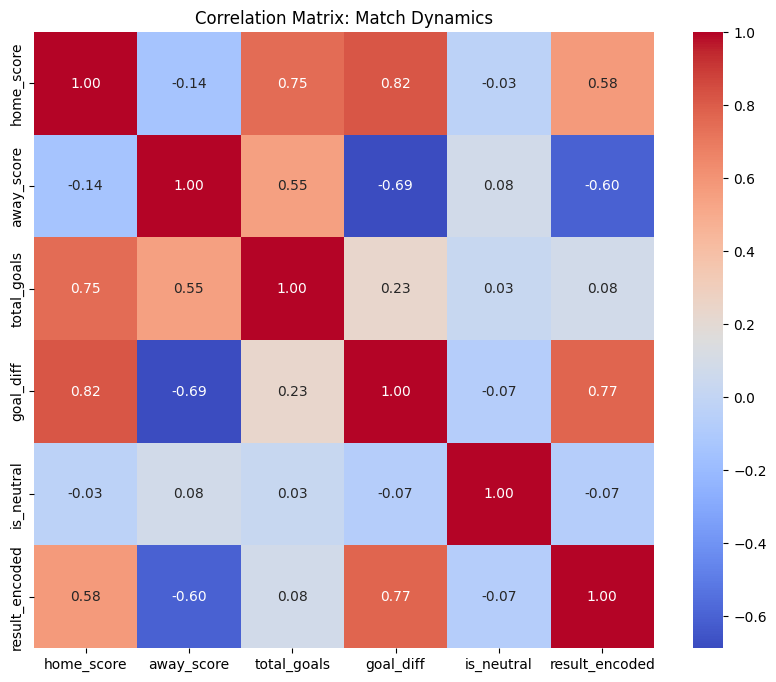

In [19]:
# --- 3. Correlation Matrix (Results DF) ---
# To do a correlation, we need to encode categorical variables or use the numeric scores
results_numeric = results.copy()
results_numeric['is_neutral'] = results_numeric['neutral'].astype(int)
results_numeric['total_goals'] = results_numeric['home_score'] + results_numeric['away_score']
results_numeric['goal_diff'] = results_numeric['home_score'] - results_numeric['away_score']

# Encoding the outcome: Win=1, Draw=0, Loss=-1 (from Home Team perspective)
results_numeric['result_encoded'] = results_numeric['outcome'].map({'Home Win': 1, 'Draw': 0, 'Away Win': -1})

corr_matrix = results_numeric[['home_score', 'away_score', 'total_goals', 'goal_diff', 'is_neutral', 'result_encoded']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Match Dynamics')
plt.show()

In [20]:
# --- 4. Feature for ML: "Star Reliability" ---
# Calculate how often a team's top scorer accounts for their total goals
scorer_counts = goalscorers.groupby(['team', 'scorer']).size().reset_index(name='goal_count')
top_scorer_per_team = scorer_counts.sort_values(['team', 'goal_count'], ascending=[True, False]).drop_duplicates('team')

print("\n--- Top Individual Goalscorers (Potential Match Winners) ---")
print(top_scorer_per_team.sort_values(by='goal_count', ascending=False).head(10))


--- Top Individual Goalscorers (Potential Match Winners) ---
                         team               scorer  goal_count
10466                Portugal    Cristiano Ronaldo         108
10403                  Poland   Robert Lewandowski          63
1298                  Belgium        Romelu Lukaku          60
4227                  England           Harry Kane          58
450                 Argentina         Lionel Messi          55
1536   Bosnia and Herzegovina           Edin Džeko          50
6401                     Iran             Ali Daei          49
5218                  Germany       Miroslav Klose          48
11689                  Serbia  Aleksandar Mitrović          47
5594                Guatemala          Carlos Ruiz          47


In [23]:
def build_feature_set(results_df, shootouts_df, goalscorers_df):
    print("Calculating team features...")
    
    # 1. Total Experience
    all_teams = pd.concat([results_df['home_team'], results_df['away_team']])
    total_matches = all_teams.value_counts().reset_index()
    total_matches.columns = ['team', 'total_matches']

    # 2. Jerarquía (Shootout Performance)
    shootout_teams = pd.concat([shootouts_df['home_team'], shootouts_df['away_team']])
    s_apps = shootout_teams.value_counts().reset_index()
    s_apps.columns = ['team', 'shootout_apps']
    s_wins = shootouts_df['winner'].value_counts().reset_index()
    s_wins.columns = ['team', 'shootout_wins']
    
    jerarquia = pd.merge(total_matches, s_apps, on='team', how='left').fillna(0)
    jerarquia = pd.merge(jerarquia, s_wins, on='team', how='left').fillna(0)
    jerarquia['shootout_win_rate'] = (jerarquia['shootout_wins'] / jerarquia['shootout_apps']).fillna(0)
    # Jerarquia Score: Win rate weighted by log of experience
    jerarquia['jerarquia_score'] = jerarquia['shootout_win_rate'] * np.log1p(jerarquia['shootout_apps'])

    # 3. Scoring Profile (Diversity & Star Power)
    scoring = goalscorers_df.groupby('team').agg(
        total_goals_hist=('scorer', 'count'),
        unique_scorers_hist=('scorer', 'nunique')
    ).reset_index()
    
    # Calculate Star Reliability (Top Scorer's % of total goals)
    top_scorers = goalscorers_df.groupby(['team', 'scorer']).size().reset_index(name='goals')
    top_scorers = top_scorers.sort_values(['team', 'goals'], ascending=[True, False]).drop_duplicates('team')
    top_scorers = top_scorers.rename(columns={'goals': 'top_scorer_goals'})
    
    scoring = pd.merge(scoring, top_scorers[['team', 'top_scorer_goals']], on='team', how='left').fillna(0)
    scoring = pd.merge(scoring, total_matches, on='team', how='left')
    
    scoring['goals_per_match'] = scoring['total_goals_hist'] / scoring['total_matches']
    scoring['diversity_index'] = scoring['unique_scorers_hist'] / scoring['total_goals_hist']
    scoring['star_reliability'] = scoring['top_scorer_goals'] / scoring['total_goals_hist']
    
    # Final Team Feature Table
    team_features = pd.merge(
        jerarquia[['team', 'jerarquia_score', 'total_matches']], 
        scoring[['team', 'goals_per_match', 'diversity_index', 'star_reliability']], 
        on='team', how='outer'
    ).fillna(0)
    
    return team_features

# Generate features
team_stats = build_feature_set(results, shootouts, goalscorers)

# Merge back into results (once for home, once for away)
df = pd.merge(results, team_stats, left_on='home_team', right_on='team', how='left').drop('team', axis=1)
df = df.rename(columns={col: 'home_' + col for col in team_stats.columns if col != 'team'})

df = pd.merge(df, team_stats, left_on='away_team', right_on='team', how='left').drop('team', axis=1)
df = df.rename(columns={col: 'away_' + col for col in team_stats.columns if col != 'team'})

# --- MATCH SPECIFIC FEATURES ---
# Real Home Advantage (Not neutral AND playing in own country)
df['is_true_home'] = ((df['neutral'] == False) & (df['home_team'] == df['country'])).astype(int)

# Target Variable (1: Home Win, 0: Draw, -1: Away Win)
df['target'] = np.where(df['home_score'] > df['away_score'], 1, 
                         np.where(df['home_score'] < df['away_score'], -1, 0))

# --- TIME DECAY WEIGHTS ---
# Older games matter less. Exponential decay towards 2025.
max_date = df['date'].max()
df['days_ago'] = (max_date - df['date']).dt.days
df['train_weight'] = np.exp(-0.0002 * df['days_ago']) # Adjust 0.0002 to change decay speed

Calculating team features...


In [25]:
df.to_csv('football_ml_ready.csv', index=False)
print("Saved matches with features to 'football_ml_ready.csv'")

Saved matches with features to 'football_ml_ready.csv'
